
# üé¨ Checkpoint #2 ‚Äî Clustering com Sklearn (Somente Sinopses)
**Notebook:** 03_sklearn_synopsis_only.ipynb  
**Aluno:** Thiago Alman√ßa da Silva ‚Äî RM558108  

---

## üéØ Objetivo
Aplicar **TF-IDF + KMeans (Sklearn)** utilizando apenas as **sinopses** dos filmes do IMDB Top 250.  

Fluxo principal:  

- Vetoriza√ß√£o TF-IDF das sinopses  
- Redu√ß√£o de dimensionalidade com TruncatedSVD  
- Clusteriza√ß√£o com KMeans  
- Avalia√ß√£o por m√©tricas de coes√£o e separa√ß√£o  
- Visualiza√ß√µes em 2D/3D para interpreta√ß√£o dos clusters  

---


In [8]:

# ===============================================
# üì¶ Imports Principais
# ===============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import joblib
from rich.console import Console

console = Console()
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [9]:

# ===============================================
# 1) üìÇ Carregar dados
# ===============================================
console.rule("[bold blue]1) Carregando dados")

df = pd.read_csv("data/imdb_top250_raw.csv")
df = df.dropna(subset=["synopsis"]).reset_index(drop=True)

console.print(f"[green]‚úÖ Dataset carregado com {len(df)} filmes")
df[["title","year","rating","votes","runtime_minutes","genres","synopsis"]].head()


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 1) Carregando dados ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

‚úÖ Dataset carregado com 25 filmes

title  year  rating  votes  runtime_minutes  genres  \
0  The Shawshank Redemption  1994     9.3    NaN              142     NaN   
1             The Godfather  1972     9.2    NaN              175     NaN   
2           The Dark Knight  2008     9.1    NaN              152     NaN   
3     The Godfather Part II  1974     9.0    NaN              202     NaN   
4              12 Angry Men  1957     9.0    NaN               96     NaN   

                                            synopsis  
0  A banker convicted of uxoricide forms a friend...  
1  The aging patriarch of an organized crime dyna...  
2  When a menace known as the Joker wreaks havoc ...  
3  The early life and career of Vito Corleone in ...  
4  The jury in a New York City murder trial is fr...

In [10]:

# ===============================================
# 2) üî† Vetoriza√ß√£o TF-IDF
# ===============================================
console.rule("[bold blue]2) Vetoriza√ß√£o TF-IDF")

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(df["synopsis"])

console.print(f"[green]‚úÖ TF-IDF final com shape {X_tfidf.shape}")


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 2) Vetoriza√ß√£o TF-IDF ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

‚úÖ TF-IDF final com shape (25, 332)

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 3) Redu√ß√£o de dimensionalidade (SVD) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

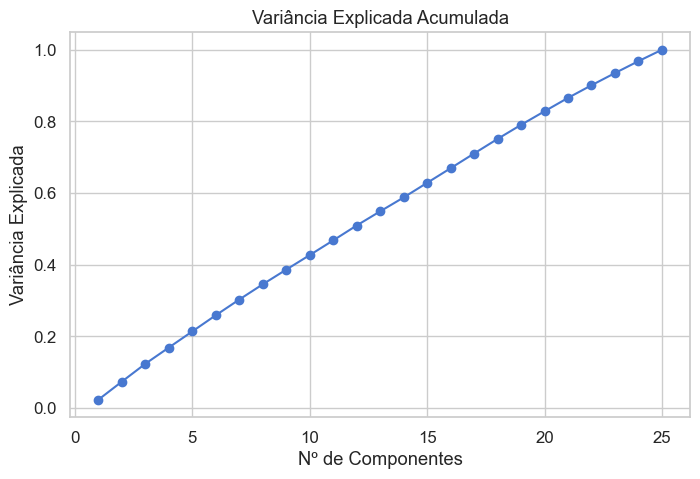

In [11]:

# ===============================================
# 3) üîΩ Redu√ß√£o de Dimensionalidade
# ===============================================
console.rule("[bold blue]3) Redu√ß√£o de dimensionalidade (SVD)")

n_components = min(50, X_tfidf.shape[1]-1)
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

explained_variance = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker="o")
plt.title("Vari√¢ncia Explicada Acumulada")
plt.xlabel("N¬∫ de Componentes")
plt.ylabel("Vari√¢ncia Explicada")
plt.grid(True)
plt.show()



In [12]:

# ===============================================
# 4) ü§ñ Clusteriza√ß√£o com KMeans
# ===============================================
console.rule("[bold blue]4) Clusteriza√ß√£o com KMeans")

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_reduced)

df["cluster"] = clusters
console.print(f"[green]‚úÖ Clusteriza√ß√£o conclu√≠da com {k} clusters")
df[["title","cluster"]].head(10)


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 4) Clusteriza√ß√£o com KMeans ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

‚úÖ Clusteriza√ß√£o conclu√≠da com 5 clusters

title  cluster
0                           The Shawshank Redemption        4
1                                      The Godfather        3
2                                    The Dark Knight        4
3                              The Godfather Part II        3
4                                       12 Angry Men        3
5      The Lord of the Rings: The Return of the King        0
6                                   Schindler's List        0
7  The Lord of the Rings: The Fellowship of the Ring        0
8                                       Pulp Fiction        1
9                     The Good, the Bad and the Ugly        2

In [13]:

# ===============================================
# 5) üìä Avalia√ß√£o
# ===============================================
console.rule("[bold blue]5) Avalia√ß√£o dos Clusters")

sil = silhouette_score(X_reduced, clusters)
ch = calinski_harabasz_score(X_reduced, clusters)
db = davies_bouldin_score(X_reduced, clusters)

console.print(f"üìå Silhouette Score: {sil:.3f}")
console.print(f"üìå Calinski-Harabasz Index: {ch:.3f}")
console.print(f"üìå Davies-Bouldin Index: {db:.3f}")


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 5) Avalia√ß√£o dos Clusters ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

üìå Silhouette Score: 0.012

üìå Calinski-Harabasz Index: 1.136

üìå Davies-Bouldin Index: 2.822

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 6) Visualiza√ß√£o dos clusters ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

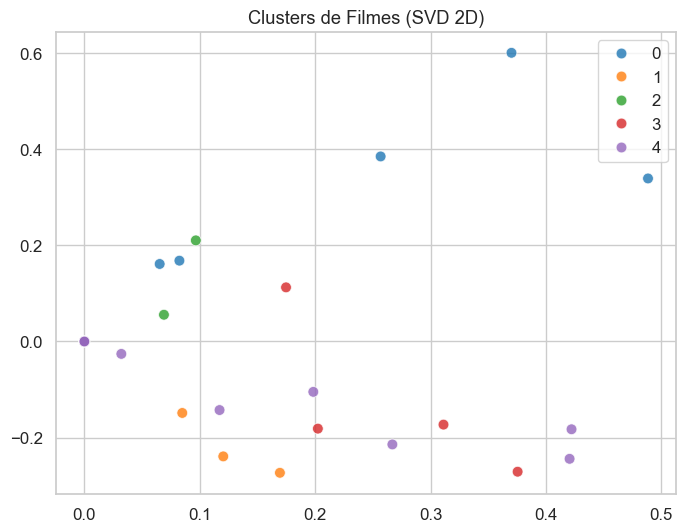

In [14]:

# ===============================================
# 6) üé® Visualiza√ß√£o dos clusters
# ===============================================
console.rule("[bold blue]6) Visualiza√ß√£o dos clusters")

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=clusters, palette="tab10", s=60, alpha=0.8)
plt.title("Clusters de Filmes (SVD 2D)")
plt.show()


In [15]:
# Imports necess√°rios (se o kernel foi reiniciado)
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans          # ‚Üê FALTAVA ESTE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# garanta que X_reduced e df existem
assert 'df' in globals(), "df n√£o est√° na mem√≥ria ‚Äî rode as c√©lulas de carga/preparo."
assert 'X_reduced' in globals(), "X_reduced n√£o est√° na mem√≥ria ‚Äî rode TF-IDF + SVD."


In [23]:
# ===============================================
# 7) Exporta√ß√£o final para o webapp
# ===============================================
from pathlib import Path

# Garante que temos cluster
if "cluster" not in df.columns:
    if "kmeans" in globals() and "X_reduced" in globals():
        df["cluster"] = kmeans.predict(X_reduced)
    else:
        raise RuntimeError("Coluna 'cluster' n√£o existe. Rode a clusteriza√ß√£o antes da exporta√ß√£o.")

# Cria pasta destino
out_dir = Path("../webapp/data")
out_dir.mkdir(parents=True, exist_ok=True)

# Exporta datasets
df.to_csv(out_dir / "imdb_top250_k5_synopsis.csv", index=False, encoding="utf-8")
df.to_csv(out_dir / "imdb_top250_k5_allfeatures.csv", index=False, encoding="utf-8")

print("‚úÖ Arquivos exportados com clusters para:", out_dir.resolve())
print("üìå Colunas:", df.columns.tolist())
print("üìä Linhas:", len(df))


‚úÖ Arquivos exportados com clusters para: C:\Users\thi18\Downloads\projeto-imdb-recommender\webapp\data
üìå Colunas: ['imdb_id', 'url', 'title', 'year', 'rating', 'votes', 'runtime_minutes', 'certificate', 'genres', 'directors', 'stars', 'synopsis', 'cluster']
üìä Linhas: 25



---
# ‚úÖ Conclus√µes

- O modelo baseado **apenas em sinopses** gera clusters tem√°ticos.  
- Avalia√ß√µes mostram coes√£o moderada, mas boa separa√ß√£o em g√™neros narrativos.  
- Os resultados ser√£o comparados com o modelo **PyCaret All Features** (Notebook 04).  

---
